Pro. Fernando Amaral  -  [www.eia.ai](https://www.eia.ai)

In [ ]:
#GPU

In [3]:
!pip install torch

In [4]:
import torch
import matplotlib.pyplot as plt
import torchvision

OSError: [WinError 126] Não foi possível encontrar o módulo especificado. Error loading "C:\Python312\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

In [2]:
use_gpu = True if torch.cuda.is_available() else False

total_images = 16

model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub', 'DCGAN', pretrained=True, useGPU=use_gpu)


Using cache found in C:\Users\andre/.cache\torch\hub\facebookresearch_pytorch_GAN_zoo_hub


Average network found !


In [1]:
torch.cuda.is_available()

NameError: name 'torch' is not defined

In [5]:
noise, _ = model.buildNoiseData(total_images)

print(noise)

tensor([[-0.6725,  0.3242, -0.1636,  ...,  0.0000,  0.0000,  1.0000],
        [-0.4664,  1.2614, -1.8580,  ...,  1.0000,  0.0000,  0.0000],
        [-0.0231, -0.6595, -0.8894,  ...,  0.0000,  1.0000,  0.0000],
        ...,
        [ 0.6153,  1.1102, -0.5294,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0424,  0.0109,  0.9794,  ...,  0.0000,  0.0000,  1.0000],
        [ 0.8486, -0.2912,  0.7908,  ...,  0.0000,  0.0000,  0.0000]])


In [6]:
with torch.no_grad():
    images = model.test(noise)

In [7]:
images = images - images.min()
images = images / images.max()

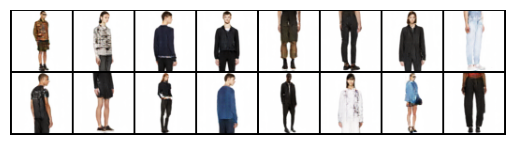

In [8]:
plt.imshow(torchvision.utils.make_grid(images).permute(1, 2, 0).cpu().numpy())
plt.axis('off')
plt.show()